#  Model Random Forest

In [169]:
import matplotlib.pyplot as plt
import pandas as pd

### 1) Reading of the processed dataset

In [170]:
X_train = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/X_train.csv")
y_train = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/y_train.csv")

X_test = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/X_test.csv")
y_test = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/y_test.csv")

df = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/raw/diabete.csv")

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,106.0,56.0,27.00000,165.000000,29.000000,0.426,22
1,1,89.0,66.0,23.00000,94.000000,28.100000,0.167,21
2,1,116.0,78.0,29.00000,180.000000,36.100000,0.496,25
3,6,115.0,60.0,39.00000,155.548223,33.700000,0.245,40
4,5,136.0,82.0,29.15342,155.548223,32.457464,0.640,69


In [171]:
print(X_train.shape, y_train.shape)


(614, 8) (614, 1)


### 2) Model initialisation and training

In [172]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 70, random_state = 71)
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=70, random_state=71)

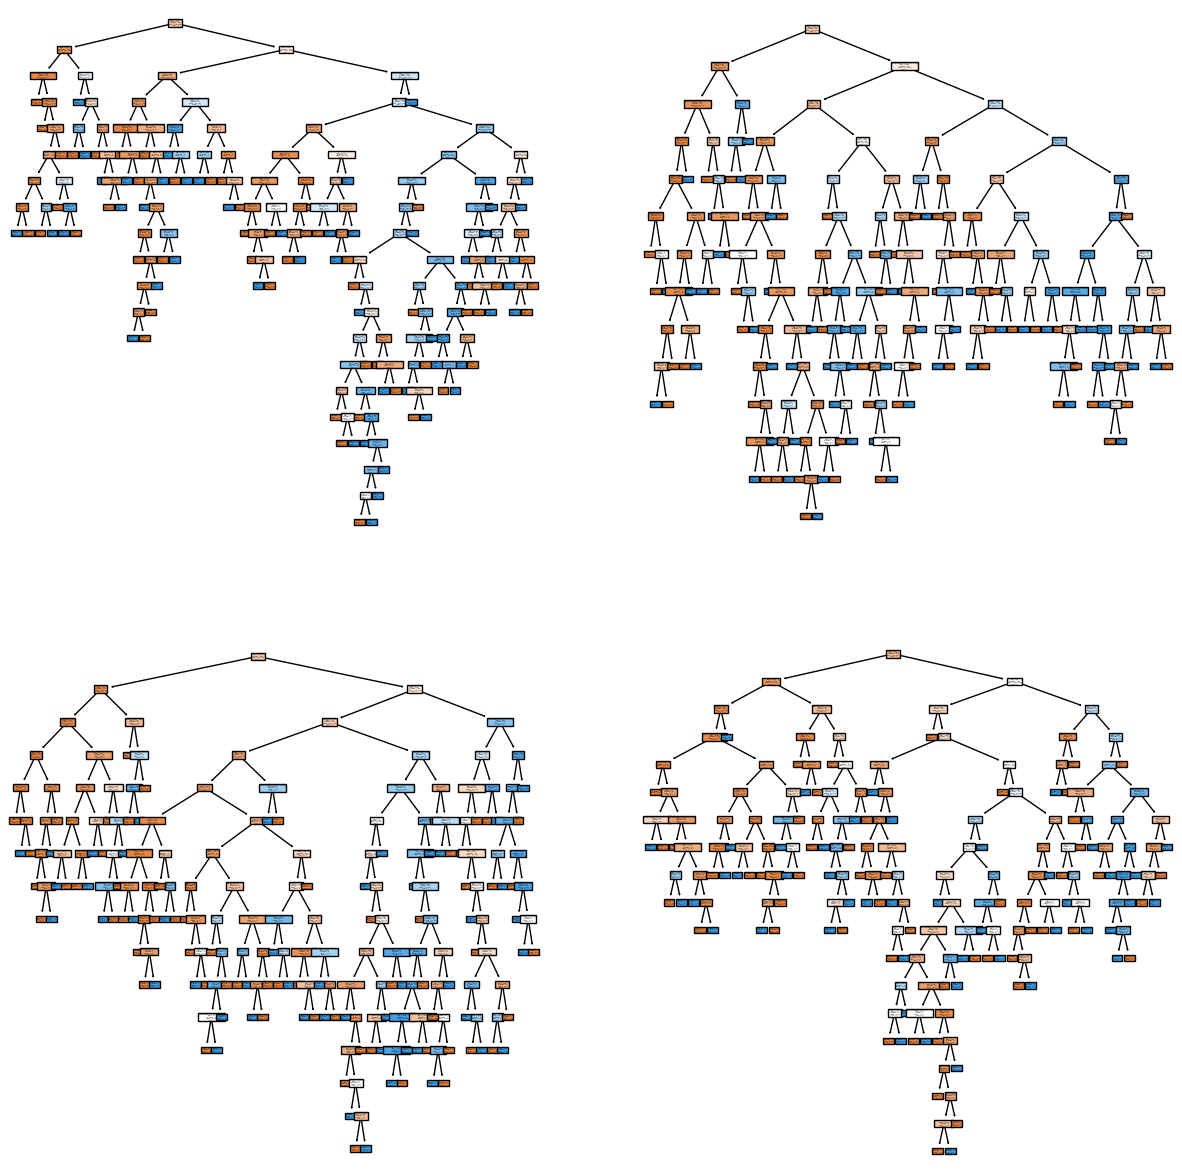

In [173]:
# Show the first 4 trees out of the 100 generated (default).
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

### 3)  Model prediction

In [174]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [175]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7597402597402597

### 4) Save the model

In [176]:
from pickle import dump

dump(model, open("/workspaces/MLRandom-Forest-PilarZarco/models/random_forest_classifier_default_71.sav", "wb"))

### 5) View graphs to understand and evaluate performance and behaviour

In [177]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

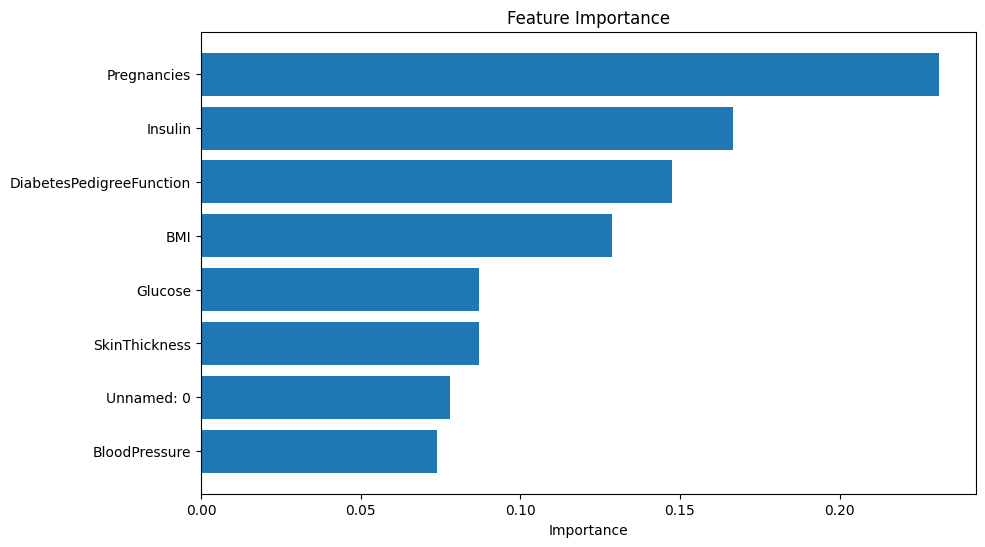

In [178]:
# Importance of Characteristics:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
features = X.columns
index = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(index)), feature_importances[index], align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Characteristics are most influential in the model's predictions.

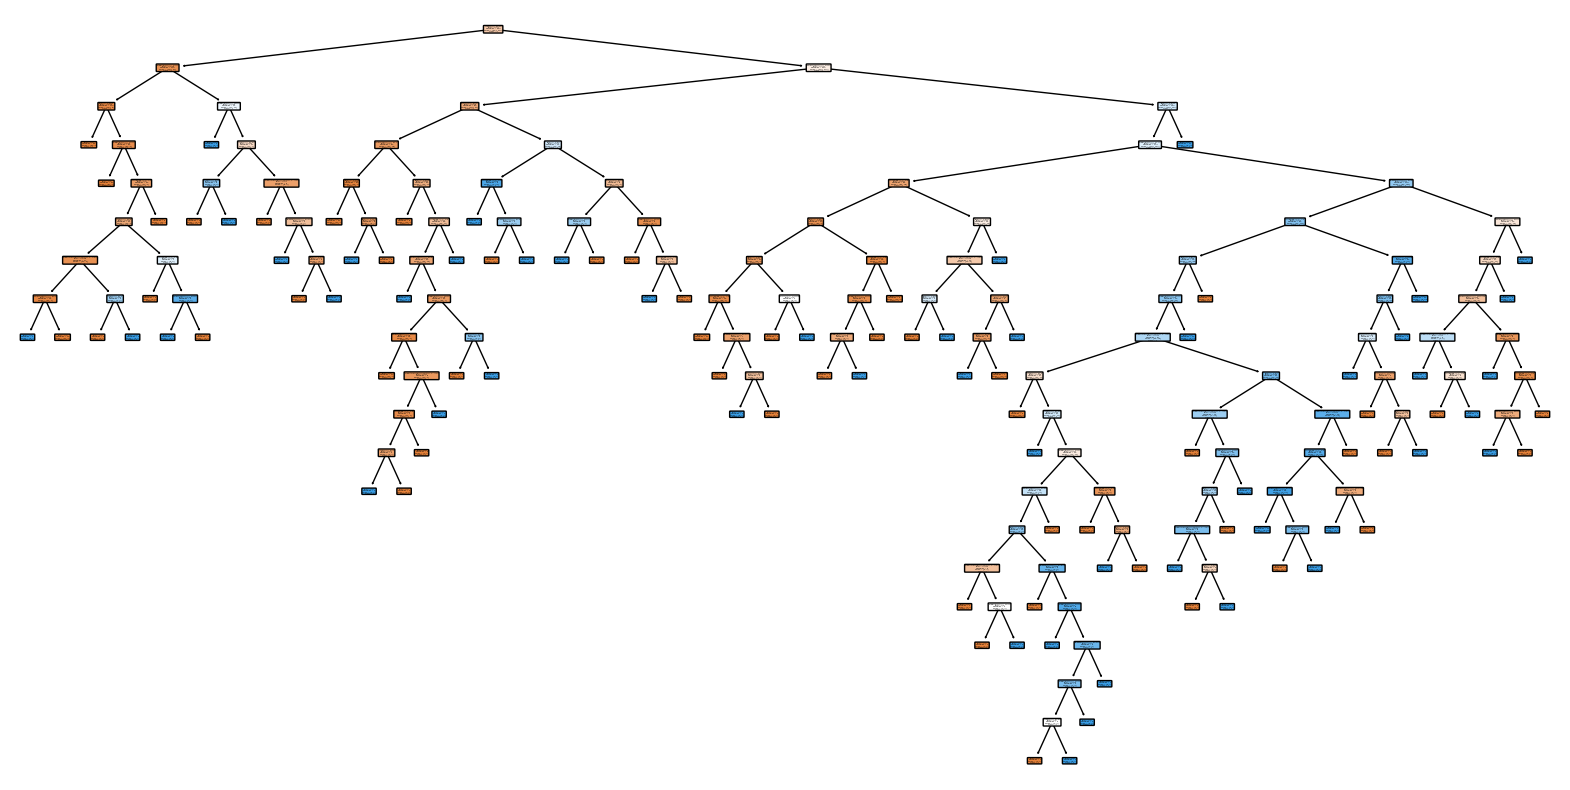

In [179]:
# Individual Trees:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, rounded=True, class_names=['0', '1'])
plt.show()

Each tree in the Random Forest operates independently during the training phase, but when a prediction is made, all trees in the forest contribute to the final decision.

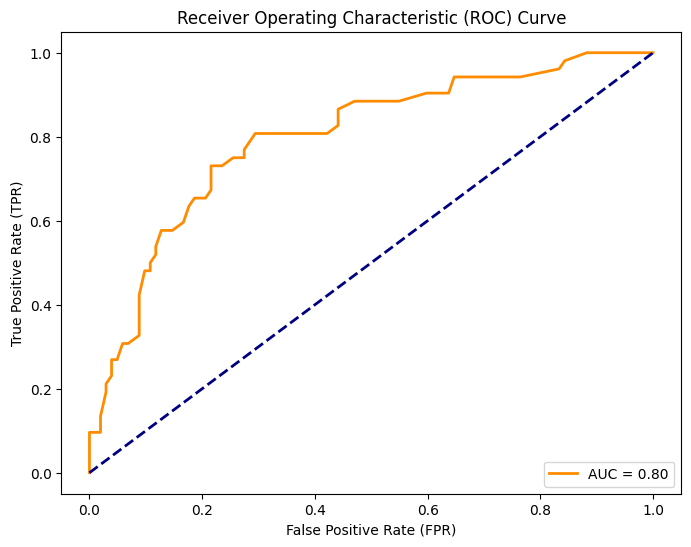

In [180]:
# ROC curve and Confusion Matrix:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted probabilities for the positive class.
y_scores = model.predict_proba(X_test)[:, 1]

# Calculates the true positive rate (TPR) and false positive rate (FPR).
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Graph the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Evaluate the performance of the model.

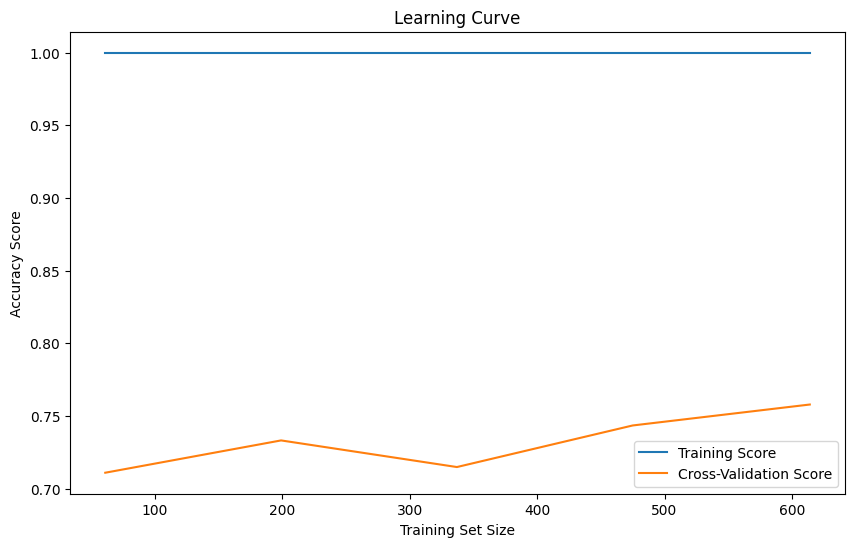

In [181]:
# Learning Curves:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

Understand how your model performs as the size of the training set increases.

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid for the visualisation of the decision regions
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the classes for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display decision regions and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, linewidth=1)
plt.title('Random Forest Decision Regions')
plt.xlabel('Characteristic 1')
plt.ylabel('Characteristic 1 2')
plt.show()


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but RandomForestClassifier is expecting 8 features as input.